# Problem framing

In [22]:
! pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


## Goal:
The main goal is to develop a predictive model that can accurately predict the probability of an individual having a bank account or not (coded as 1 for "Yes" and 0 for "No"). This prediction is to be made for each unique identifier in the test dataset. The context is specific to four East African countries – Kenya, Rwanda, Tanzania, and Uganda. The model will be trained on 70% of the available data and tested on the remaining 30.

## SMART Criteria:
**Specific**: The goal is specific in predicting the probability of bank account ownership for individuals in East African countries, focusing on Kenya, Rwanda, Tanzania, and Uganda.<br>
**Measurable**: The success of the model can be measured by its accuracy in predicting whether an individual has a bank account or not<br>
**Achievable**: Developing a predictive model for binary classification is achievable, especially with machine learning techniques. The goal is realistic given the availability of data and the nature of the prediction task.<br>
**Relevant**: Predicting bank account ownership is relevant for financial inclusion efforts and can provide valuable insights into the economic landscape of the East African countries.<br>
**Time-bound**: The model will be trained on training and evaluate on the test, indicating a clear time boundary for the project.<br>

## Feasibility:
Machine Learning is an appropriate approach for this predictive task, considering the binary classification nature of the problem. Machine Learning techniques can handle complex patterns and relationships in the data where simple programming task fail.<br>

## Data quality:
We have 12 features for 23524 train data and 10086 test data. That means we have enough data for modeling task.<br>

## Technical expression:
**Model's Goal**: The model aims to predict the probability (binary classification) of an individual having a bank account or not based on demographic and economic features. Specifically, it targets achieving a high accuracy in predicting the binary outcome (Yes = 1, No = 0) for each unique identifier in the test dataset.<br>
**Success/Failure Metric**: The success metric is the accuracy of the model on the test dataset. Additional metrics such as precision, recall, and F1-score will be considered to evaluate the model's performance comprehensively.<br>
**Inputs (features)**:
    Country (Categorical)<br>
    Year (Numeric)<br>
    Location Type (Categorical: Rural, Urban)<br>
    Cellphone Access (Categorical: Yes, No)<br>
    Household Size (Numeric)<br>
    Age of Respondent (Numeric)<br>
    Gender of Respondent (Categorical: Male, Female)<br>
    Relationship with Head (Categorical)<br>
    Marital Status (Categorical)<br>
    Education Level (Categorical)<br>
    Job Type (Categorical)<br>
 **Output**: Probability score indicating the likelihood of an individual having a bank account.<br>
 **Metrics**: Confusion matrix, accuracy score

# Data collection

No data collection task. Dataset was provided by Zindi.

### Importing libraries

In [ ]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import

# Exploratory data analysis (data wrangling + data analysis)

### 1. Load the dataset

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows shapes of train and test dataset. We have 13 variables in the train dataset, 12 descritpor variables (features) and 1 dependent variable (target). And in the test dataset, only the 12 descriptor variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [ ]:
# inspect train data
print(train.shape)
train.head()

(23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



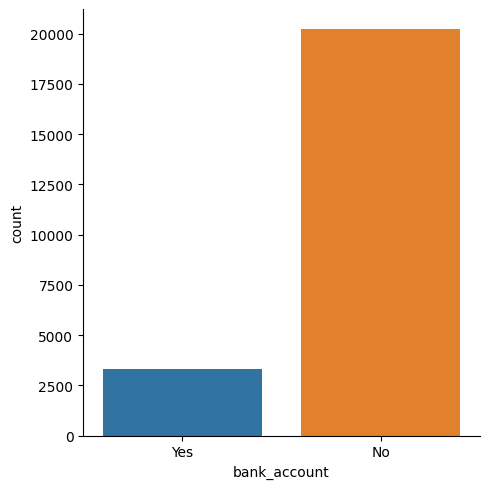

In [ ]:
# Explore Target distribution
sns.catplot(x="bank_account", kind="count", data=train)

### 2. Understand the dataset

In [ ]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

### 3. Data preparation for modeling

In [ ]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [ ]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

Preprocess both train and test dataset.

In [ ]:
# preprocess the train data
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [ ]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


Observe the shape of the train data.

In [ ]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


# Modeling task (train/evaluate models)

In [24]:
from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from skopt import BayesSearchCV
import ray
import ray.tune as tune
from ray.tune.sklearn import TuneGridSearchCV

In [ ]:
# dataset definition and functions definition
y = y_train
X = processed_train

In [ ]:
# hyperparameter range value

max_depth_range = list(range(1, 51, 5))
n_estimator_range = list(range(10, 101, 10))

In [ ]:
# hyperparameter tuning with ray tune

search_space = {
    "n_estimators": n_estimator_range,
    "max_depth": max_depth_range
}

tune_search = TuneGridSearchCV(
    RandomForestClassifier(random_state=42),
    search_space,
    max_iters=10,
    cv=5
)

tune_search.fit (X, y)
best_params = tune_search.best_params_
best_score = tune_search.best_score_

print(f"Best parameters: {best_params}")

print(f"Best score with the best parameters: {best_score}")

/usr/local/lib/python3.10/dist-packages/tune_sklearn/tune_basesearch.py:365: UserWarning: max_iters is set > 1 but incremental/partial training is not enabled. To enable partial training, ensure the estimator has `partial_fit` or `warm_start` and set `early_stopping=True`. Automatically setting max_iters=1.
  warnings.warn(
2024-01-11 13:36:48,877	INFO worker.py:1724 -- Started a local Ray instance.
2024-01-11 13:36:50,251	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-01-11 13:36:50,254	INFO tune.py:592 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-01-11 13:36:55,510	WARNING tune.py:901 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, wra

+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2024-01-11_13-36-50   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 100                              |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2024-01-11_13-36-50
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2024-01-11_13-36-50`

Best parameters: {'n_estimators': 10, 'max_depth': 1}
Best score with the best parameters: 0.8592076203488833


In [28]:
# with bayesian optimization

opt = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    search_space,
    n_iter=10,
    random_state=42,
    n_jobs=-1,
    cv=5
)

opt.fit(X, y)
best_params = opt.best_params_
best_score = opt.best_score_

print(f"Best parameters: {best_params}")

print(f"Best score with the best parameters: {best_score}")

Best parameters: OrderedDict([('max_depth', 1), ('n_estimators', 80)])
Best score with the best parameters: 0.8592076203488833
